In [ ]:
import pandas as pd
import mysql.connector



#Code for connecting with MySQL database and fetching data
conn = mysql.connector.connect(
    host="localhost",
    port=3306,
    user="root",
    password="123",
    database="data_new"
)

query = "SELECT * FROM data_science_salaries;"
data = pd.read_sql(query, conn)
conn.close()

: 

In [32]:
#Donloading libraries
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\kubus\Downloads\archive (21)\data_science_salaries.csv")
data = data.dropna()


data = data.drop("employment_type", axis=1)




  

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   work_models         6599 non-null   object
 3   work_year           6599 non-null   int64 
 4   employee_residence  6599 non-null   object
 5   salary              6599 non-null   int64 
 6   salary_currency     6599 non-null   object
 7   salary_in_usd       6599 non-null   int64 
 8   company_location    6599 non-null   object
 9   company_size        6599 non-null   object
dtypes: int64(3), object(7)
memory usage: 515.7+ KB


In [19]:
avg_salary_exp = data.groupby('experience_level')['salary'].mean().reset_index()
avg_salary_exp.to_csv("data_salaries.csv", index=False)



In [20]:
top_jobs = data.groupby('job_title')['salary'].mean().sort_values(ascending=False).head(10).reset_index()
top_jobs.to_csv("data_salaries1.csv", index=False)

In [21]:
avg_salary_company = data.groupby("company_size")["salary"].mean().reset_index()
avg_salary_company.to_csv("data_salaries2.csv", index=False)

In [26]:
label_cols = ["job_title", "work_models", "work_year", "employee_residence", "salary_currency", "company_location", "company_size"]
label_encoders = {}
data["salaries_bins"] = pd.cut(data["salary"], bins=[0, 50000, 100000, 150000, 200000, float("inf")], labels=[1, 2, 3, 4, 5])
data["salaries_bins"] = data["salaries_bins"].astype(int)

for col in label_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
    
target_encoder = LabelEncoder()
data["experience_level"] = target_encoder.fit_transform(data["experience_level"])

X = data[["job_title", "company_size", "salaries_bins", "work_models", "work_year", "employee_residence", "salary_currency", "company_location"]]
y = data["experience_level"]


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [29]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))

                 precision    recall  f1-score   support

    Entry-level       0.38      0.32      0.34       101
Executive-level       0.45      0.16      0.23        57
      Mid-level       0.48      0.33      0.39       346
   Senior-level       0.70      0.84      0.76       816

       accuracy                           0.63      1320
      macro avg       0.50      0.41      0.43      1320
   weighted avg       0.60      0.63      0.61      1320



In [ ]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X_train.columns, filled=True)
plt.savefig('decision_tree.png')

InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got RandomForestClassifier(random_state=42) instead.

<Figure size 1200x600 with 0 Axes>

In [34]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))

                 precision    recall  f1-score   support

    Entry-level       0.48      0.31      0.37       101
Executive-level       0.64      0.12      0.21        57
      Mid-level       0.52      0.34      0.41       346
   Senior-level       0.70      0.88      0.78       816

       accuracy                           0.66      1320
      macro avg       0.58      0.41      0.44      1320
   weighted avg       0.63      0.66      0.63      1320



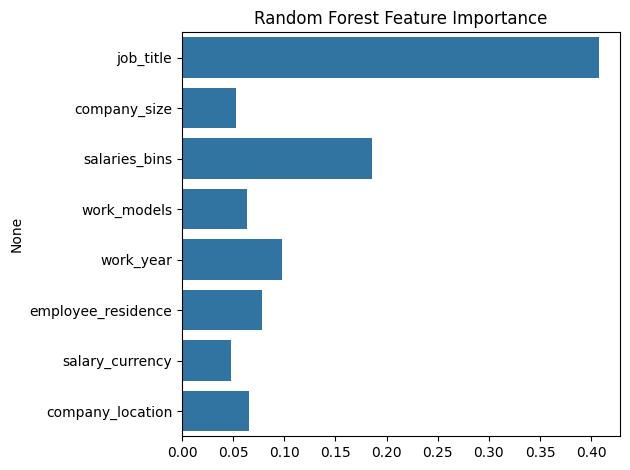

In [36]:
feat_importance = model.feature_importances_
sns.barplot(x=feat_importance, y=X.columns)
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.savefig("rf_feature_importance.png")

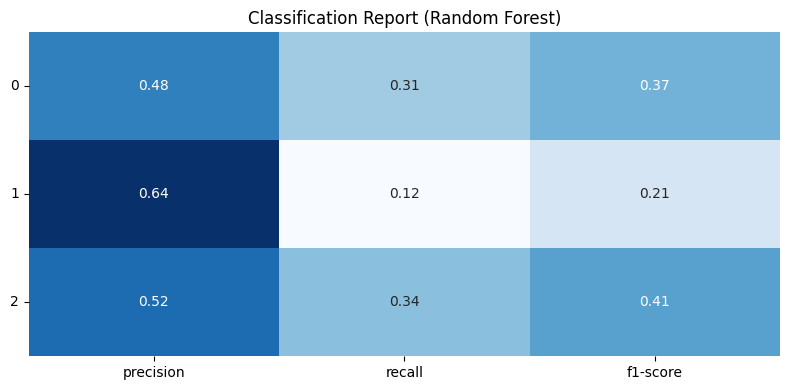

In [41]:
# Get predictions (if not already done)
y_pred = model.predict(X_test)

# Generate classification report
report_dict = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report_dict).transpose().round(2)

# Drop 'accuracy', it's just a single value
df_report = df_report.drop(index=['accuracy'])

# Plot
plt.figure(figsize=(8,4))
sns.heatmap(df_report.iloc[:-3, :3], annot=True, cmap='Blues', cbar=False)

plt.title("Classification Report (Random Forest)")
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('classification_report.png', dpi=150)
plt.show()